In [1]:
import pandas as pd
import numpy as np

In [2]:
pm = pd.read_csv("archive/ai4i2020.csv")

In [3]:
pm.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [4]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
pm.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

Let's check for any imbalance in the distribution of data

In [6]:
import matplotlib.pyplot as plt
# Class distribution
pm['Machine failure'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Machine Failure')
plt.xlabel('Failure (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [7]:
# Count occurrences of each class
failure_counts = pm['Machine failure'].value_counts()
print(failure_counts)

# Percentage distribution
percentage = pm['Machine failure'].value_counts(normalize=True) * 100
print(percentage)


0    9661
1     339
Name: Machine failure, dtype: int64
0    96.61
1     3.39
Name: Machine failure, dtype: float64


In [8]:
import seaborn as sns

In [9]:
# Dropping UID and Product ID as they are not useful
pm.drop(['Product ID', 'UDI'], axis=1, inplace = True)
pm.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  TWF  HDF  PWF  OSF  RNF  
0         42.8                0                0    0    0    0    0    0  
1         46.3                3                0    0    0    0    0    0  
2         49.4                5                0    0    0    0    0    0  
3         39.5                7                0    0    0    0    0    0  
4         40.0                9                0    0    0    0    0    0

In [10]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   TWF                      10000 non-null  int64  
 8   HDF                      10000 non-null  int64  
 9   PWF                      10000 non-null  int64  
 10  OSF                      10000 non-null  int64  
 11  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [11]:
pm_numeric = pm.select_dtypes(include=[np.number])
pm_numeric.describe().transpose()

count        mean         std     min     25%  \
Air temperature [K]      10000.0   300.00493    2.000259   295.3   298.3   
Process temperature [K]  10000.0   310.00556    1.483734   305.7   308.8   
Rotational speed [rpm]   10000.0  1538.77610  179.284096  1168.0  1423.0   
Torque [Nm]              10000.0    39.98691    9.968934     3.8    33.2   
Tool wear [min]          10000.0   107.95100   63.654147     0.0    53.0   
Machine failure          10000.0     0.03390    0.180981     0.0     0.0   
TWF                      10000.0     0.00460    0.067671     0.0     0.0   
HDF                      10000.0     0.01150    0.106625     0.0     0.0   
PWF                      10000.0     0.00950    0.097009     0.0     0.0   
OSF                      10000.0     0.00980    0.098514     0.0     0.0   
RNF                      10000.0     0.00190    0.043550     0.0     0.0   

                            50%     75%     max  
Air temperature [K]       300.1   301.5   304.5  
Process temperature [K]   310.1   311.1   313.8  
Rotational speed [rpm]   1503.0  1612.0  2886.0  
Torque [Nm]                40.1    46.8    76.6  
Tool wear [min]           108.0   162.0   253.0  
Machine failure             0.0     0.0     1.0  
TWF                         0.0     0.0     1.0  
HDF                         0.0     0.0     1.0  
PWF                         0.0     0.0     1.0  
OSF                         0.0     0.0     1.0  
RNF                         0.0     0.0     1.0

In [12]:
# overall descriptive information on categorical attributes
pm_categorical = pm.select_dtypes(include=[np.object_])
pm_categorical.describe().transpose()

count unique top  freq
Type  10000      3   L  6000

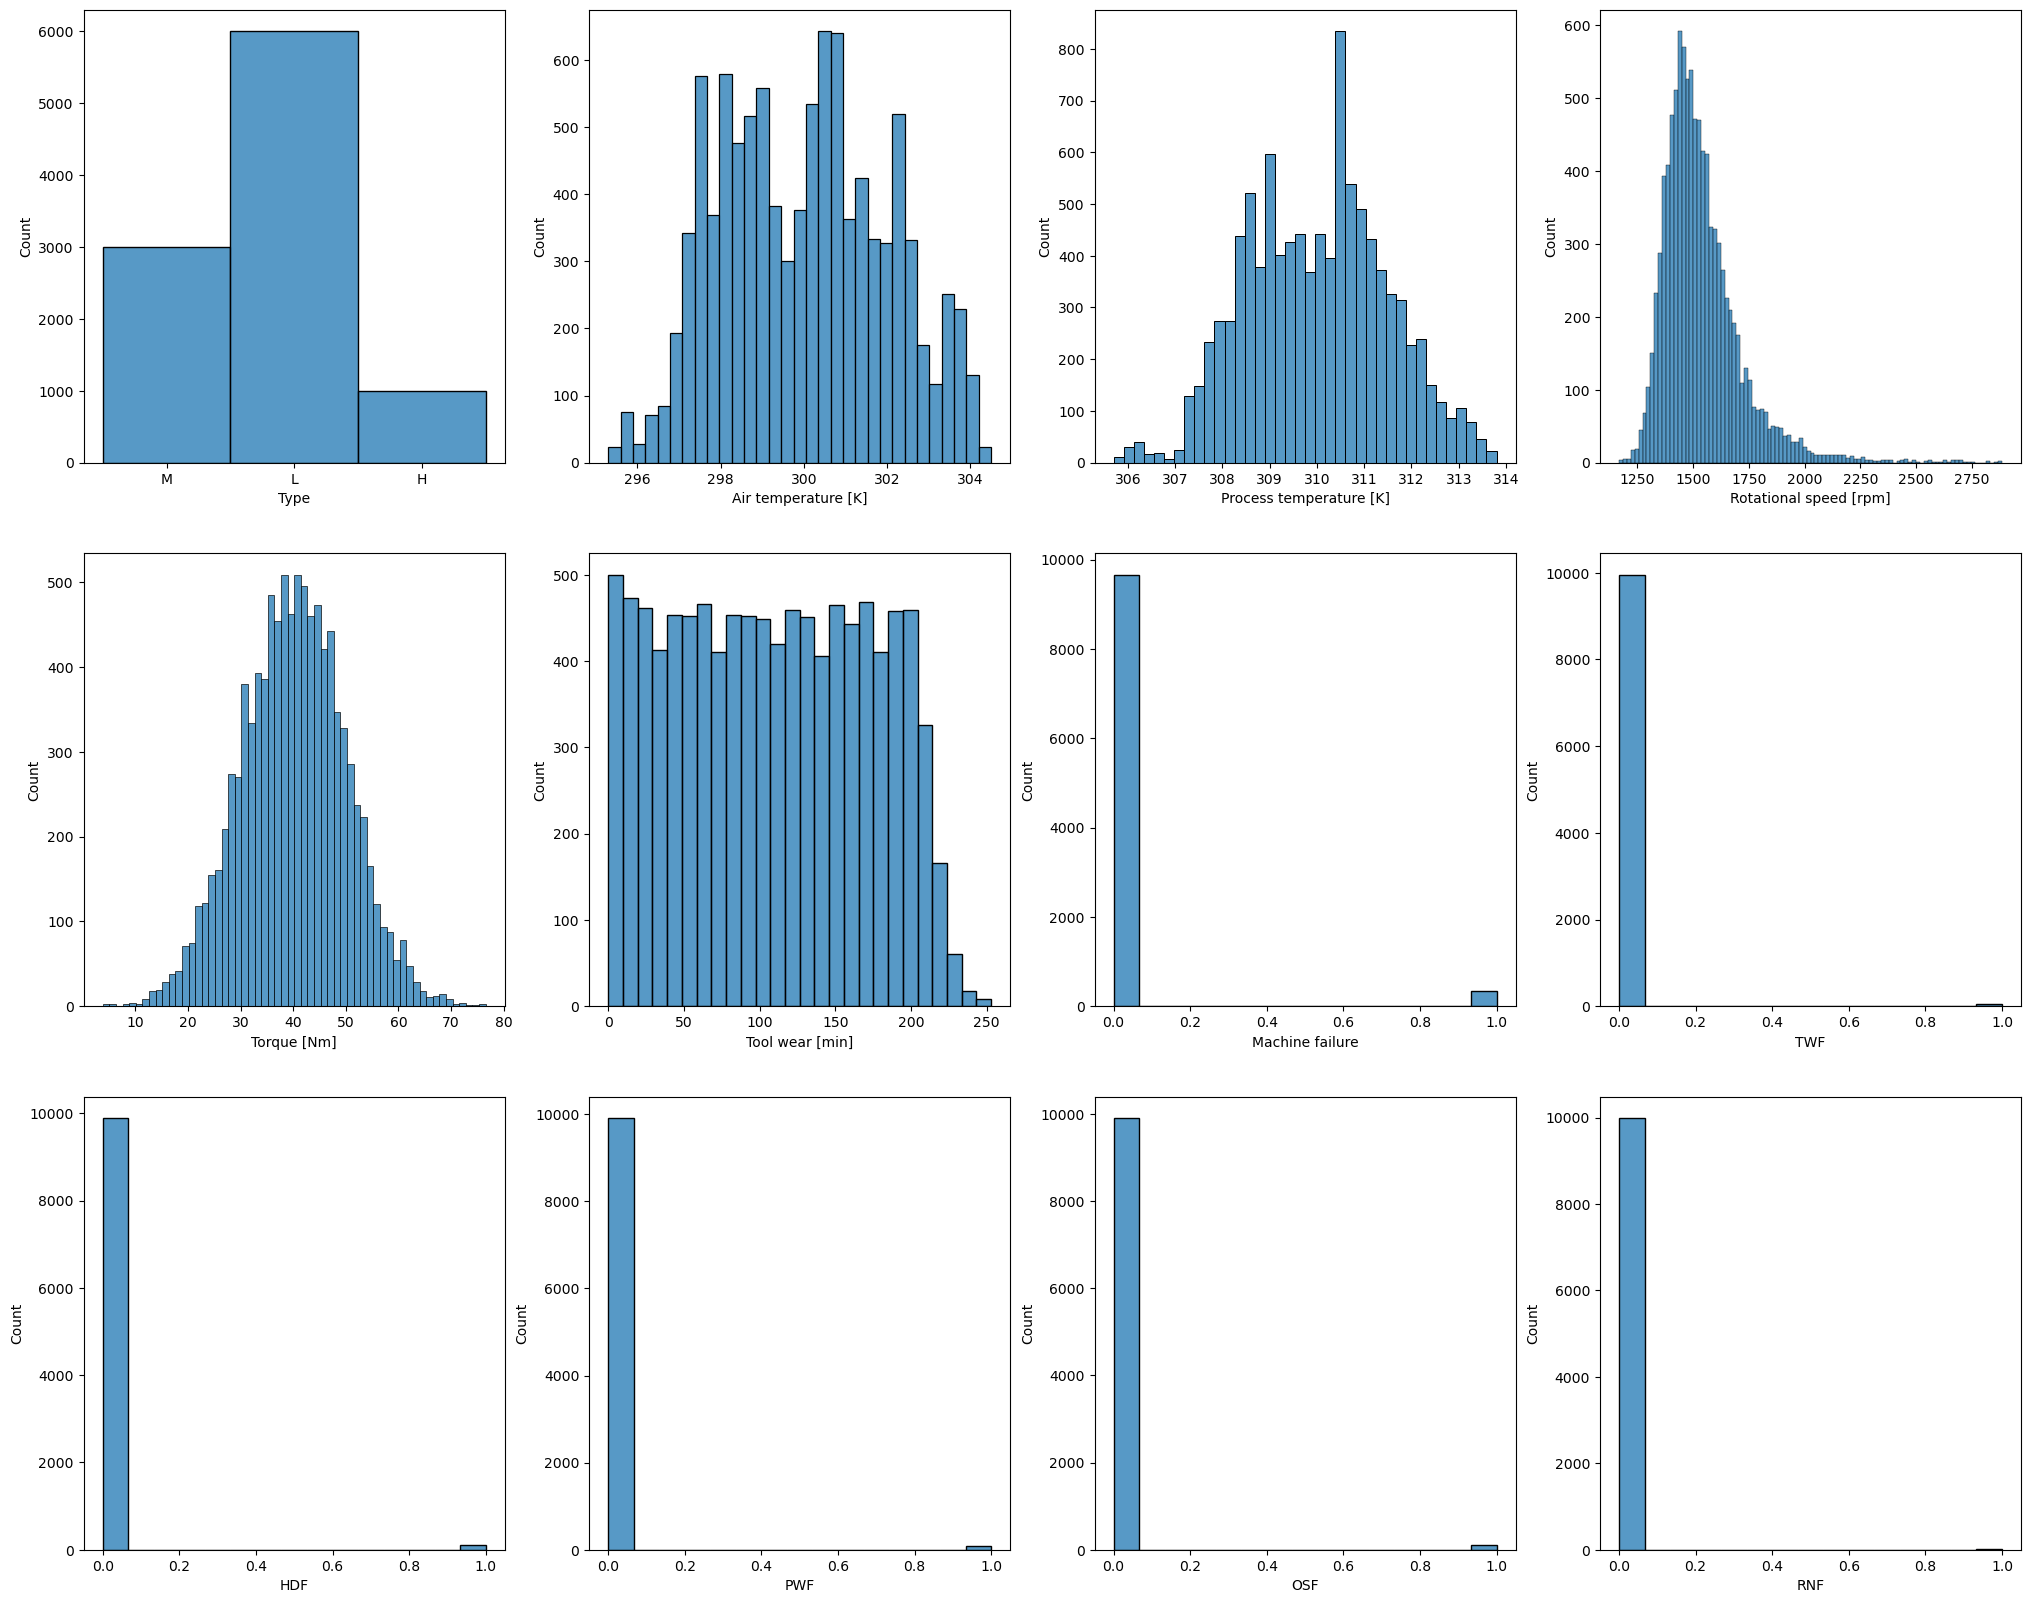

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(25, 20))

for i, col in enumerate(pm.columns):
    sns.histplot(pm[col], ax=ax[i//4][i%4])

In [14]:
pm_failures = pm.loc[:, ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

# Calculate the sum of the values in each row
rows_sum = pm_failures.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
ax.set_title('Number of Failures due to Multiple Factors')

Text(0.5, 1.0, 'Number of Failures due to Multiple Factors')

As simultaneous failure causes of >1 type is rare, we will consider the problem as a binary classification problem

In [15]:
pm['Machine failure'] = 0

pm.loc[pm['TWF'] == 1, 'Machine failure'] = 1
pm.loc[pm['HDF'] == 1, 'Machine failure'] = 1
pm.loc[pm['PWF'] == 1, 'Machine failure'] = 1
pm.loc[pm['OSF'] == 1, 'Machine failure'] = 1
pm.loc[pm['RNF'] == 1, 'Machine failure'] = 1

# drop individual failure types
pm.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

The above code has converted the problem into binary classification and has removed the multi-label failure types

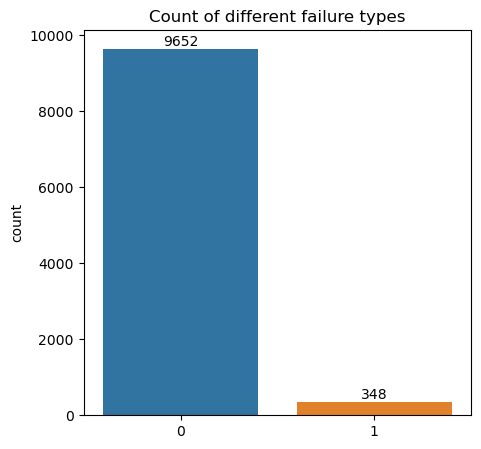

In [16]:
failure_types = pm.loc[:, ['Machine failure']]

rows_sum = failure_types.sum(axis=1)

fig, ax = plt.subplots(figsize=(5, 5))
sns.countplot(x=rows_sum, ax=ax)
for patch in ax.patches:
    ax.annotate(str(patch.get_height()), (patch.get_x() + patch.get_width()/2, patch.get_height()), ha='center', va='bottom')
    ax.set_title('Count of different failure types')

Counting the number of machine failures and non-failures

We can introduce a new feature Power = Torque X Rotational Speed

<AxesSubplot:xlabel='Power', ylabel='Count'>

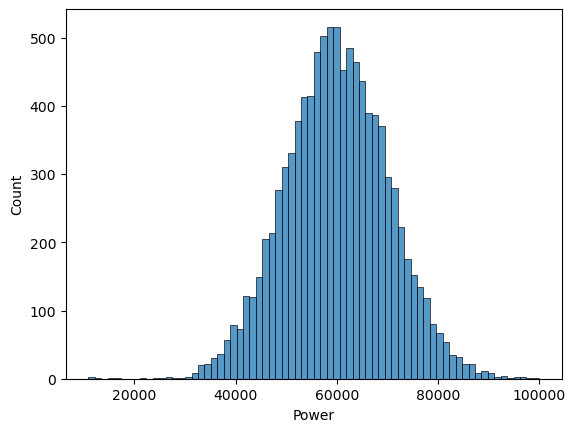

In [17]:
pm['Power'] = pm[['Rotational speed [rpm]', 'Torque [Nm]']].product(axis=1)
# Plot the histogram of Power attribute
sns.histplot(pm['Power'])

### Label Encoding for 'Type' attribute

In [18]:
# convert Type attribute into numbers, such that L = 0, M = 1, and H = 2
pm['Type'].replace('L', 0, inplace=True)
pm['Type'].replace('M', 1, inplace=True)
pm['Type'].replace('H', 2, inplace=True)

In [19]:
# turn all columns into float for easier processing later
for column in pm.columns:
    pm[column] = pm[column].astype(float)

### Handling of Outliers

In [20]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Type', 'Machine failure']

In [21]:
for col in pm.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = pm[col].quantile(0.25)
        Q3 = pm[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = pm[(pm[col] <= (Q1 - 1.5 * IQR)) | (pm[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          pm.drop(outliers.index, inplace=True)

### Density-Based Anomaly Detection (LOF)

In [22]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=5)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(pm)

# identify the outlier rows (those with a negative score) and remove them
outliers = pm[scores == -1]
if not outliers.empty:
    pm.drop(outliers.index, inplace=True)

In [23]:
pm.shape # after removing the outliers

(9400, 8)

## Normalizing using Z-scores

In [24]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in pm.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        pm[col] = zscore(pm[col])

## Box and Whisker Plot Visualization

In [25]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for i, col in enumerate(pm.columns):
    sns.boxplot(x="Machine failure", y=col, data=pm, ax=ax[i//4][i%4])

Plotting Box and whisker plot for each attribute

<AxesSubplot:title={'center':'Box and Whisker Plots'}, ylabel='Value'>

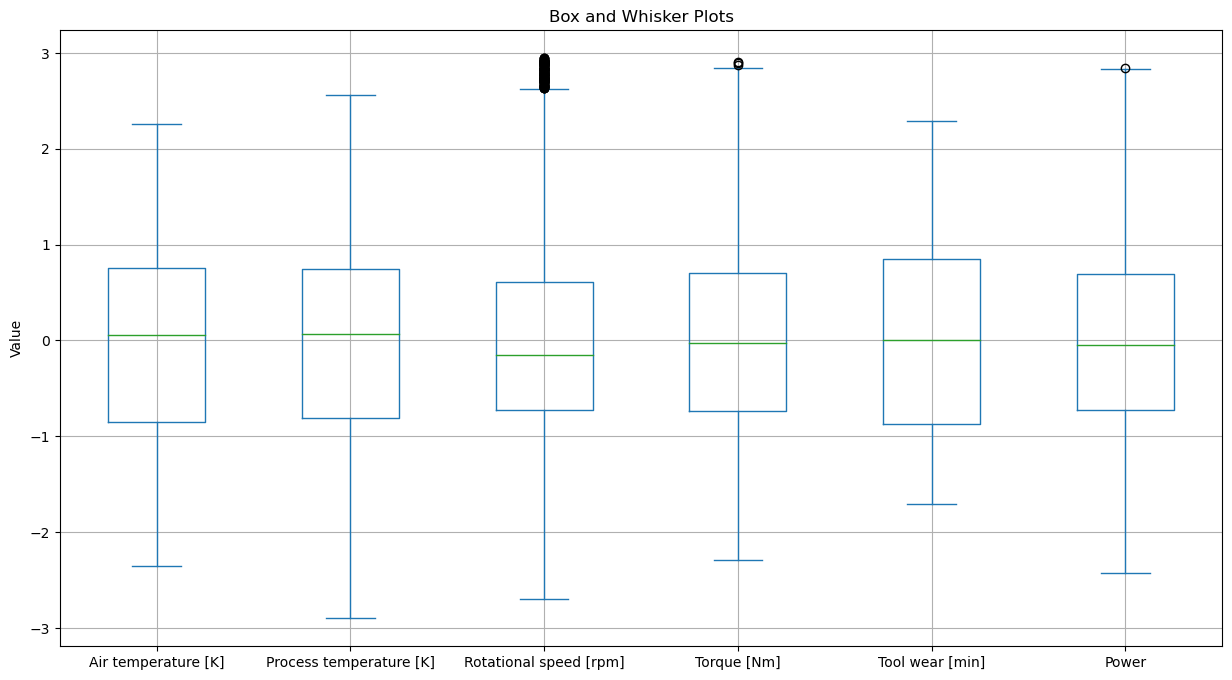

In [26]:
plot_columns = [col for col in pm.columns if col not in excluded_columns]
pm[plot_columns].plot(kind='box', figsize=(15, 8), title='Box and Whisker Plots', ylabel='Value', grid=True)

<AxesSubplot:>

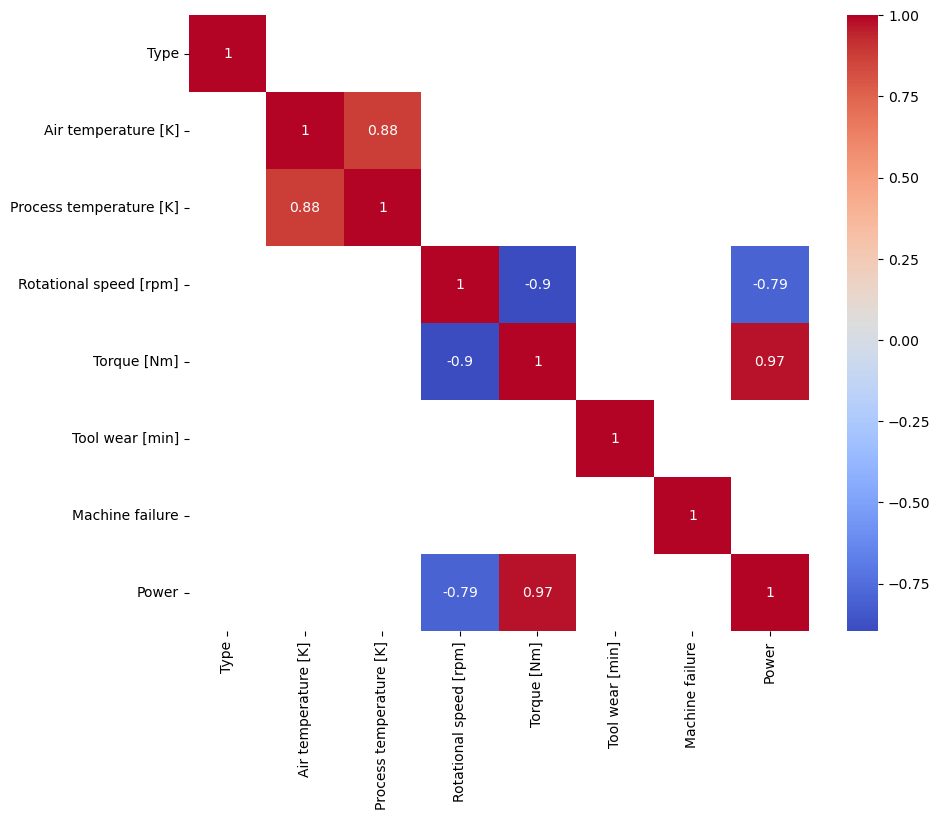

In [27]:
# There are strongly correlated features
threshold = 0.3
correlation = pm.corr()
matrix = correlation.where((abs(correlation) >= threshold)).isna()
plt.figure(figsize=(10, 8))
sns.heatmap(pm.corr(), cmap="coolwarm", annot=True, mask=matrix)

## Clustering

In [28]:
# features to use for clustering
X = pm[["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Power"]]

In [35]:
!pip install --user yellowbrick

  Using cached yellowbrick-1.5-py3-none-any.whl (282 kB)


### K-Means Clustering

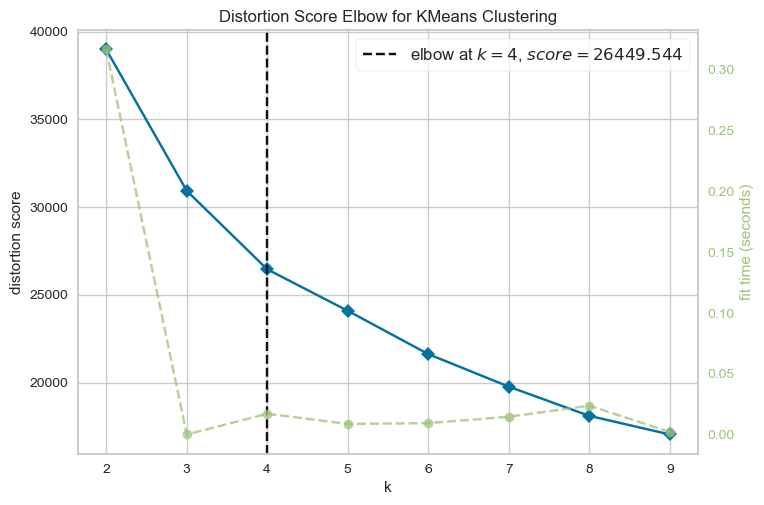

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# K-means clustering
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,10)) 

visualizer.fit(X)
visualizer.show()

In [30]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X)

pm["kmeans_cluster"] = kmeans.predict(X)

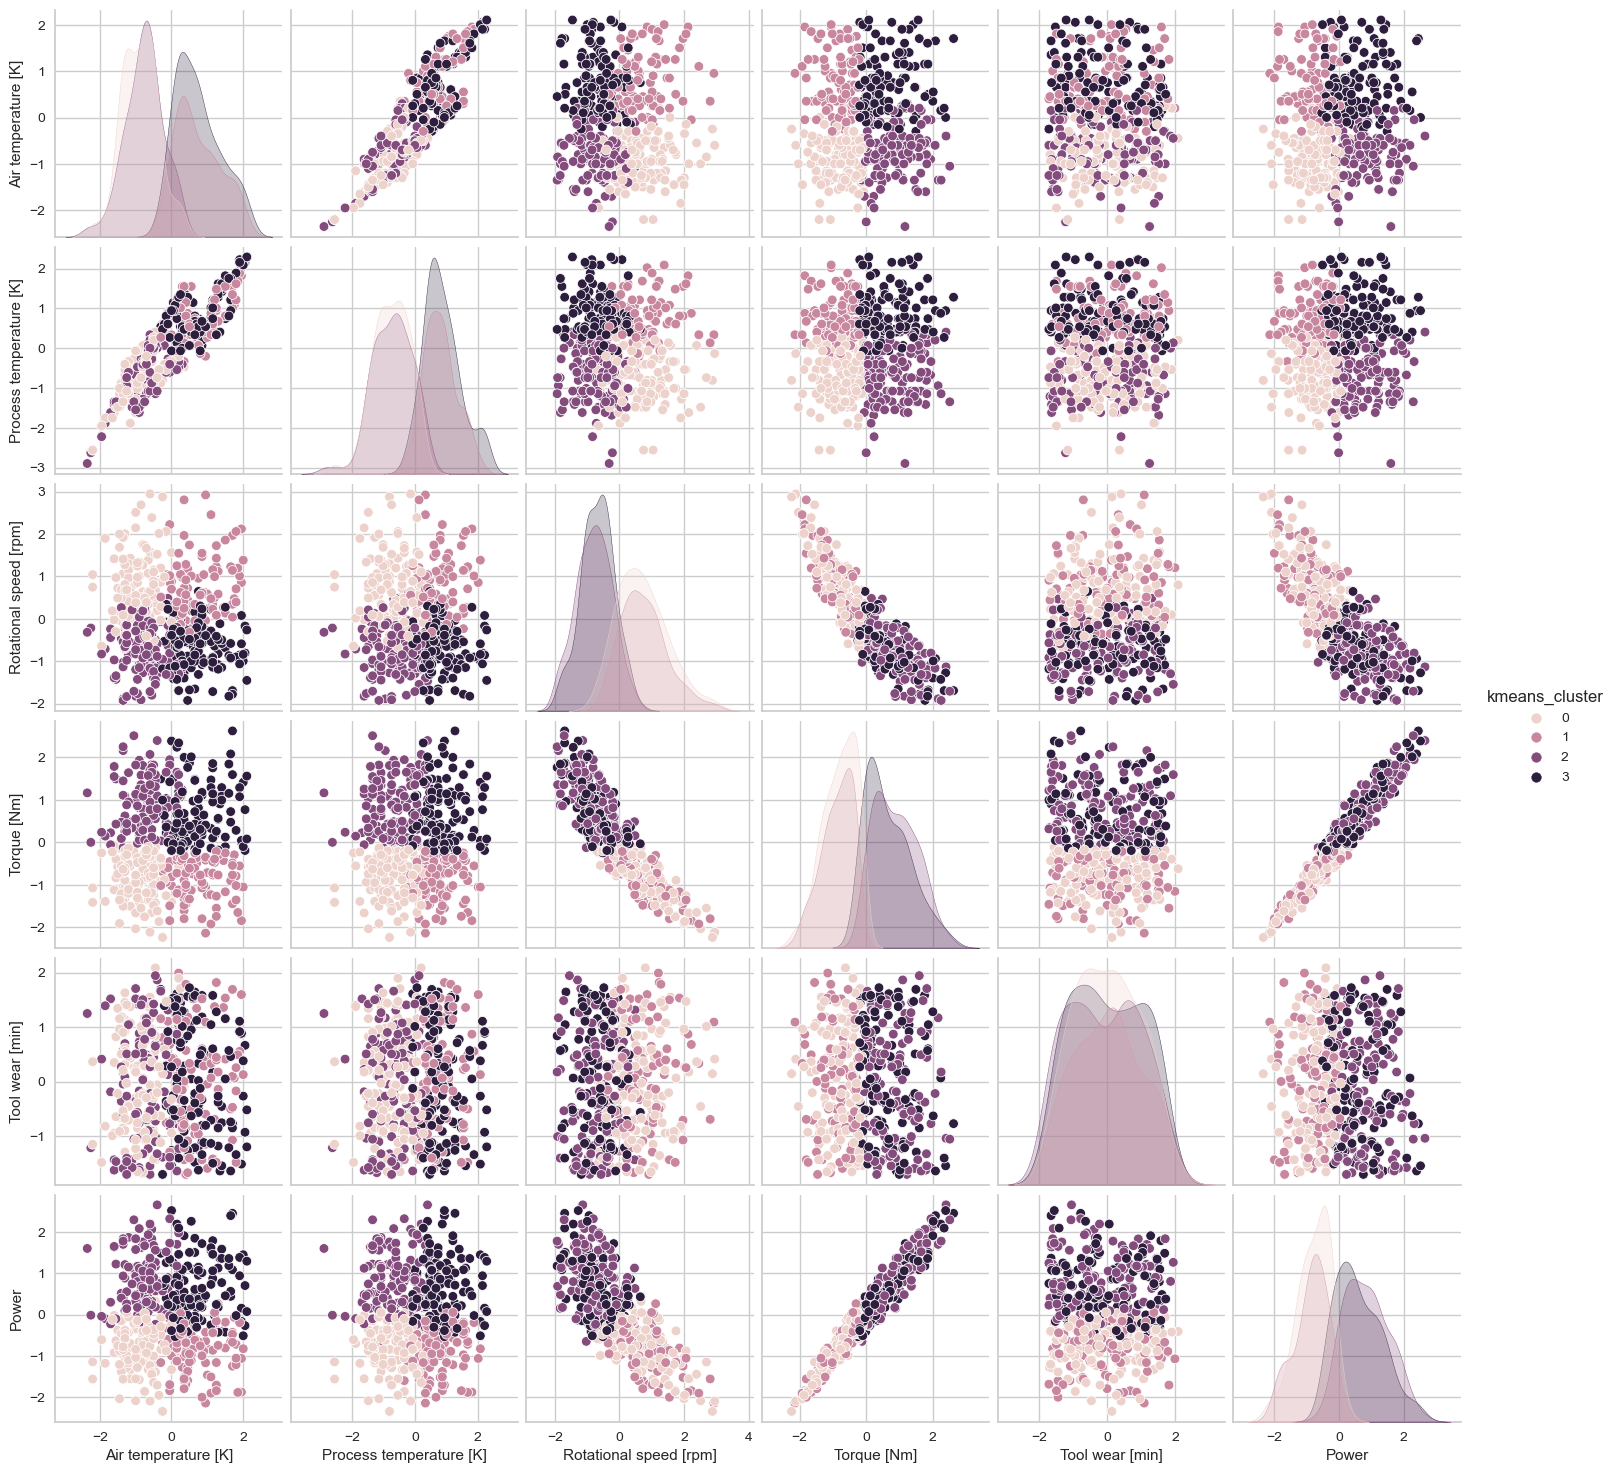

In [31]:
# create a pairplot of the data, colored by cluster label
sns.pairplot(pm.sample(frac=0.05), hue="kmeans_cluster", vars=["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Power"])

Silhouette coefficient for k-means algorithm

In [32]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.225


### Agglomerative Clustering

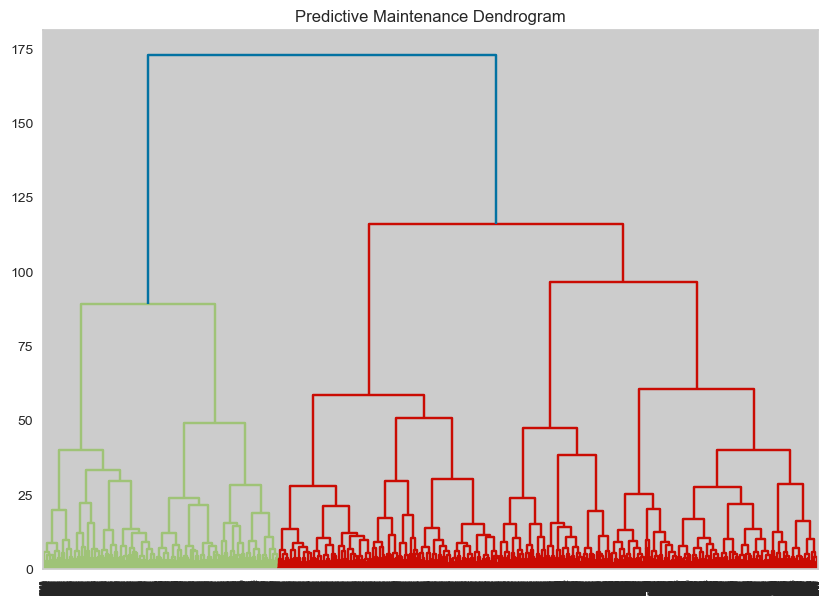

In [33]:
import scipy.cluster.hierarchy as shc

# plot dendogram
plt.figure(figsize=(10, 7))
plt.title("Predictive Maintenance Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
model.fit(X)
pm["hierarchical_cluster"] = model.labels_

Plotting the result

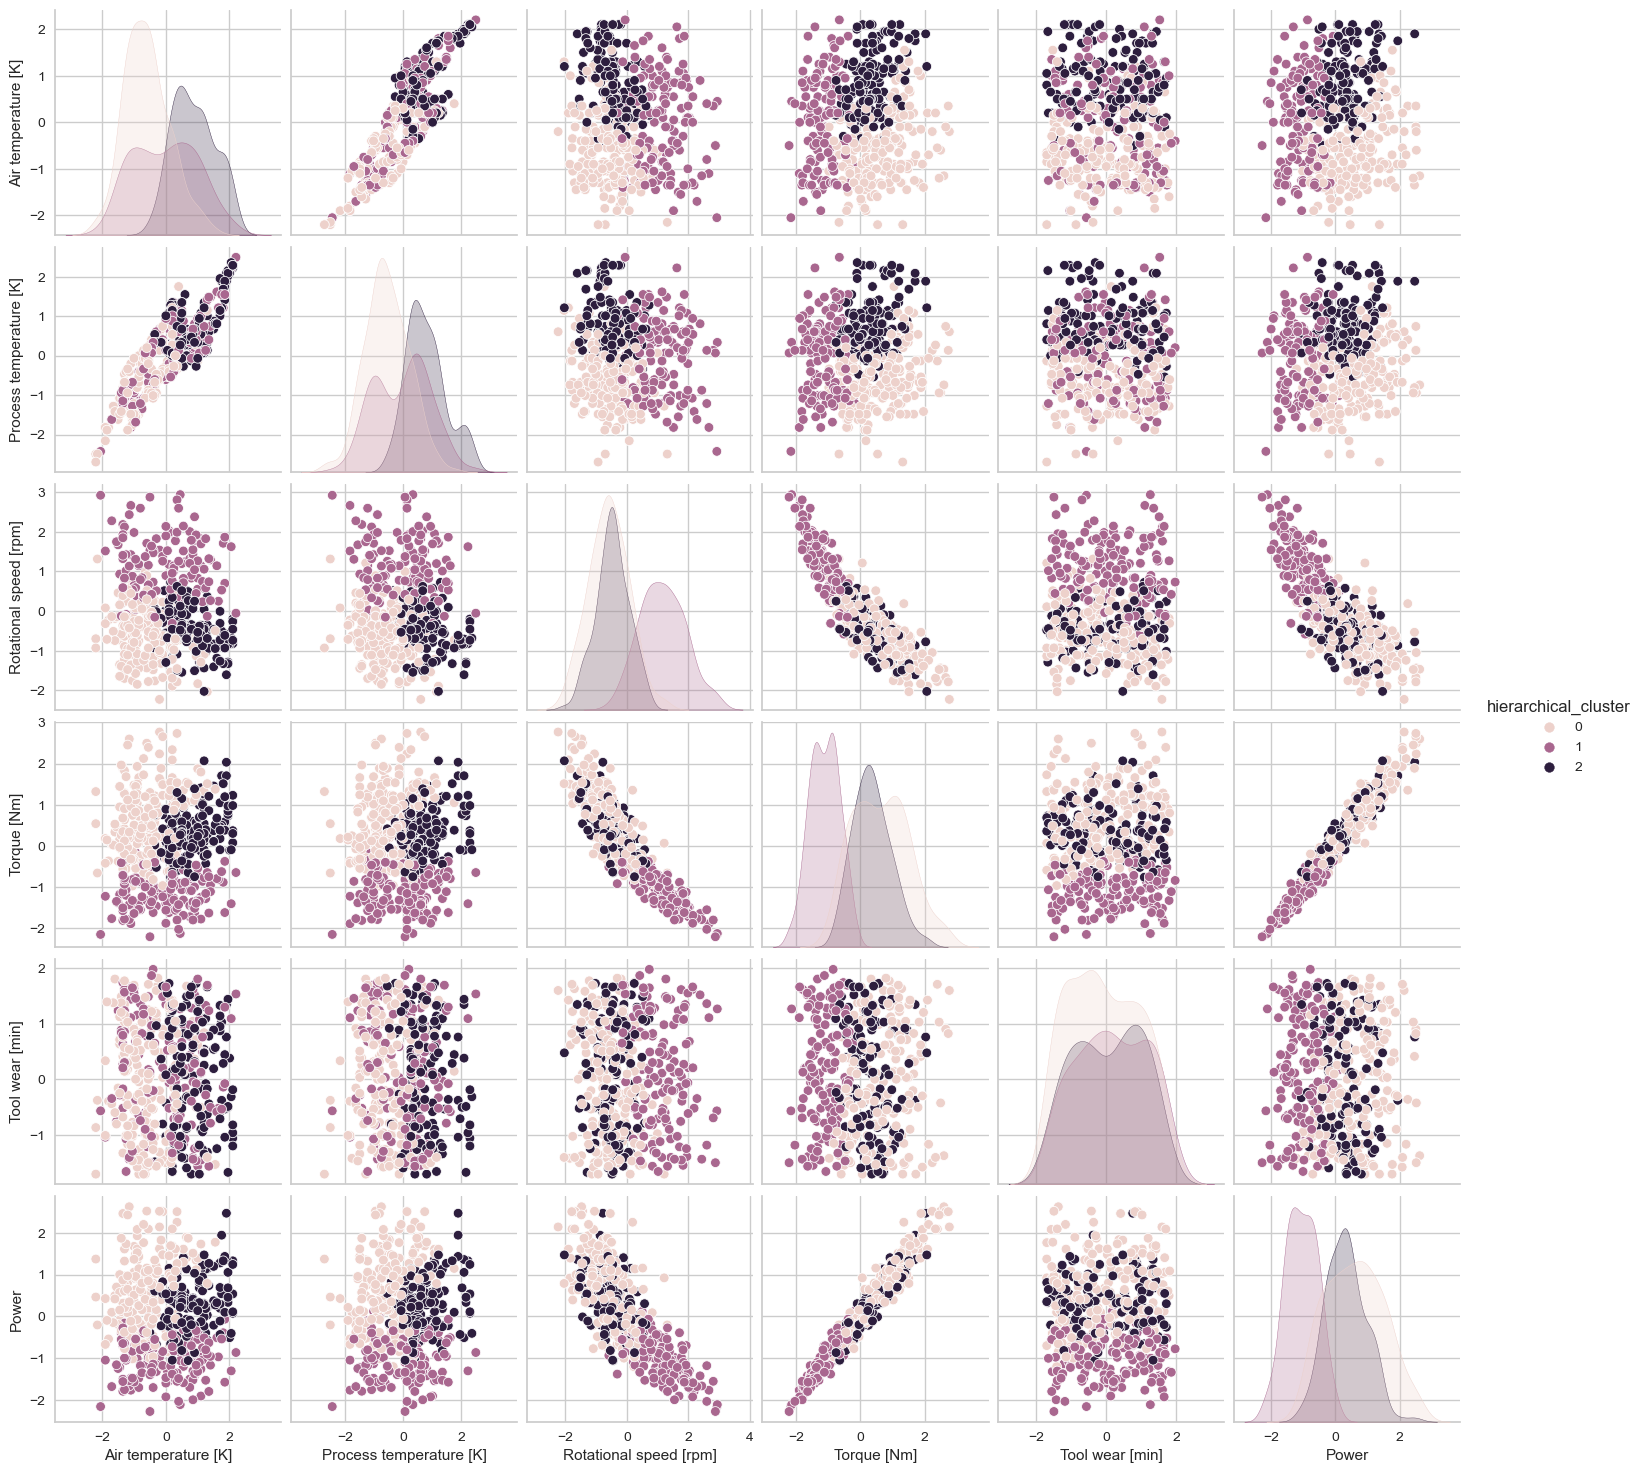

In [35]:
# create a pairplot of the data, colored by cluster label
sns.pairplot(pm.sample(frac=0.05), hue="hierarchical_cluster", vars=["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Power"])

Silhouette Score

In [36]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, pm["hierarchical_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.180


### DBSCAN

Finding EPS and Minimum number of sample points for DBSCAN

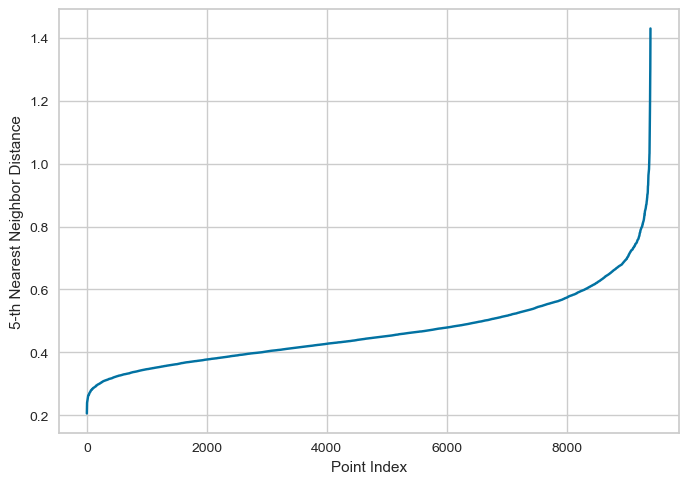

In [37]:
from sklearn.neighbors import NearestNeighbors

k = 5

# create the nearest neighbors model
nn = NearestNeighbors(n_neighbors=k)
nn.fit(X)

# get the distances and indices of the kth nearest neighbors for each point
distances, indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

# sort the kth nearest neighbor distances
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5-th Nearest Neighbor Distance')
plt.show()

In [38]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
pm['dbscan_cluster'] = model.labels_

In [39]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, pm["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.292


Result Plotting

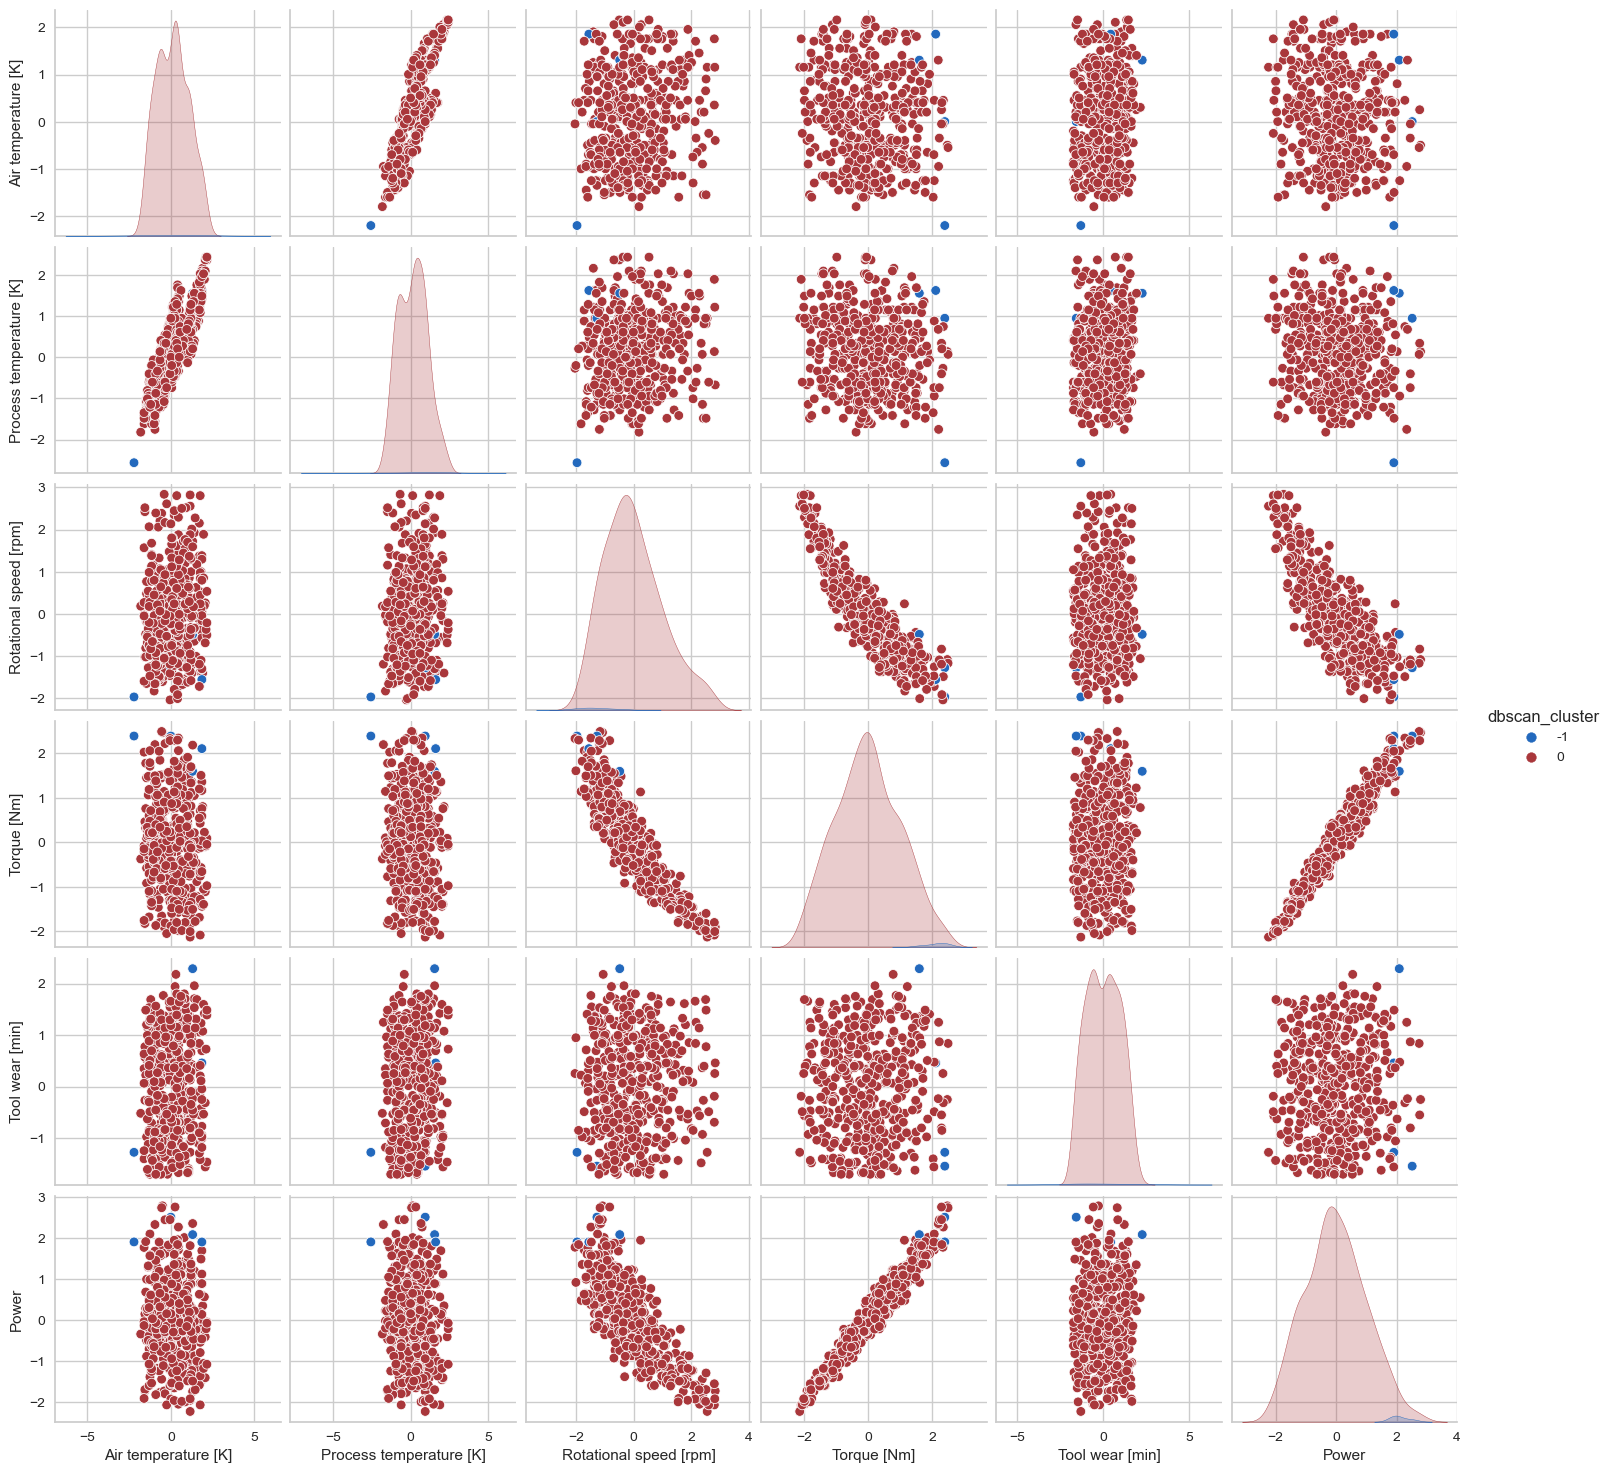

In [40]:
# create a pairplot of the data, colored by cluster label
sns.pairplot(pm.sample(frac=0.05), hue="dbscan_cluster", palette="vlag", vars=["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]", "Power"])

## Model Training

In [41]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report
import time

model_performance = pd.DataFrame(columns=['Accuracy', 'Precision',
                                          'Recall', 'F1-Score', 'Training time',
                                          'Prediction time'])

def log_scores(model_name, y_test, y_predictions):
    accuracy = accuracy_score(y_test, y_predictions)
    precision = precision_score(y_test, y_predictions, average='weighted')
    recall = recall_score(y_test, y_predictions, average='weighted')
    precision = precision_score(y_test, y_predictions, average='weighted')
    f1 = f1_score(y_test, y_predictions, average='weighted')

    # save the scores in model_performance dataframe
    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                       end_train-start, end_predict-end_train]

## Data Splitting and Sampling

In [42]:
pm.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'Power', 'kmeans_cluster', 'hierarchical_cluster',
       'dbscan_cluster'],
      dtype='object')

Data Split in the ratio: 70% training and 30% testing

In [43]:
from sklearn.model_selection import train_test_split

X = pm.drop(["Machine failure", "kmeans_cluster", "hierarchical_cluster", "dbscan_cluster"], axis=1)
y = pm["Machine failure"]

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 0,
                                                    stratify = y)

Due to highly imbalance in the data, we will oversample the data

In [44]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import RandomOverSampler

oversample = SVMSMOTE(random_state = 42)
#oversample = RandomOverSampler(random_state=42)

X_train_osampled, y_train_osampled = oversample.fit_resample(X_train, y_train)

Text(0.5, 1.0, 'Class Distribution')

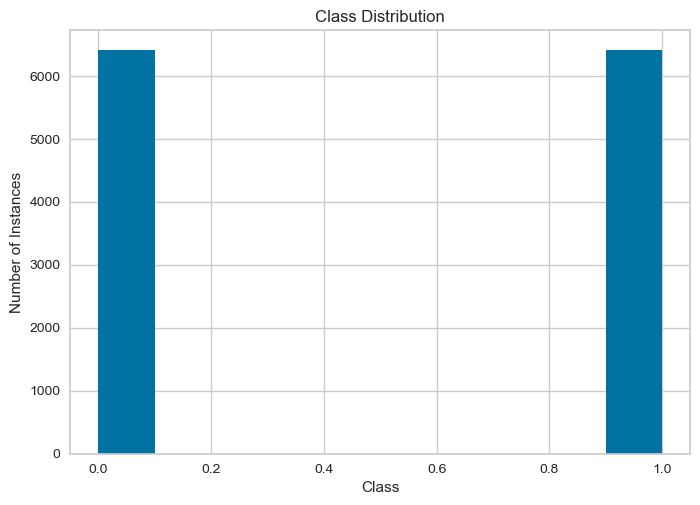

In [45]:
plt.hist(y_train_osampled)
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.title("Class Distribution")

### 1. Decision Tree Model

In [46]:
from sklearn.tree import DecisionTreeClassifier

start = time.time()
model = DecisionTreeClassifier(max_depth = 8).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)

Model evaluation for each Machine failure class:
1. No Machine Failure
2. Machine Failure

In [47]:
print("Decision Tree\n" + classification_report(y_test, y_predictions))

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.41      0.73      0.52        74

    accuracy                           0.97      2820
   macro avg       0.70      0.85      0.75      2820
weighted avg       0.98      0.97      0.97      2820



In [49]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

Clearly Decision Tree Model is Overfitting so we try to reduce model complexity by decreasing max_depth and increase min_samples_split to prevent memorization

In [51]:
model_DT = DecisionTreeClassifier(max_depth=5, min_samples_split=10, class_weight="balanced", random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_DT.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)
print("Decision Tree\n" + classification_report(y_test, y_predictions))
train_sizes, train_scores, test_scores = learning_curve(model_DT, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.35      0.68      0.47        74

    accuracy                           0.96      2820
   macro avg       0.67      0.82      0.72      2820
weighted avg       0.97      0.96      0.97      2820



There is decrease in Overfitting. Lets go with GridSearchCV to fine tune the model further

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, 10],  # Experiment with smaller depths
    'min_samples_split': [5, 10, 20]  # Increase min_samples_split further
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train_osampled, y_train_osampled)

print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 5}


Decision Tree
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.42      0.73      0.53        74

    accuracy                           0.97      2820
   macro avg       0.71      0.85      0.76      2820
weighted avg       0.98      0.97      0.97      2820



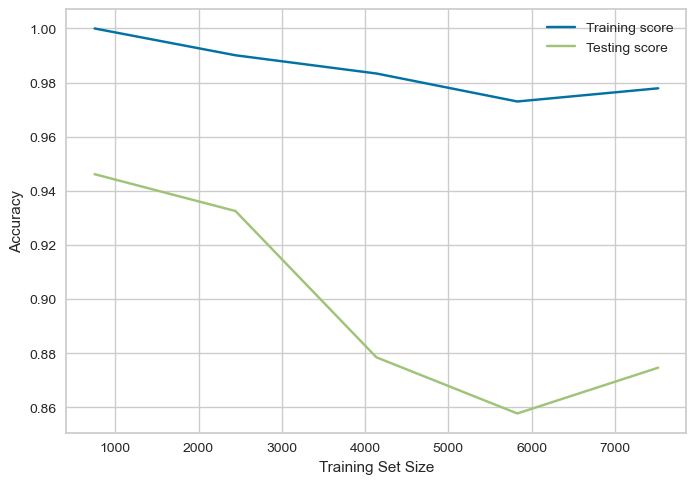

In [53]:
model_DT2 = DecisionTreeClassifier(max_depth=10, min_samples_split=5, class_weight="balanced", random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_DT2.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Decision Tree", y_test, y_predictions)
print("Decision Tree\n" + classification_report(y_test, y_predictions))
train_sizes, train_scores, test_scores = learning_curve(model_DT2, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

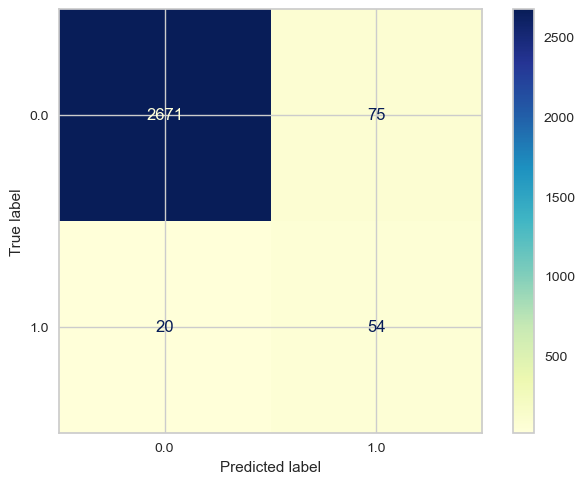

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)

## 2. KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV

# create the model
knn = KNeighborsClassifier()

# define the parameter grid
param_grid = {'n_neighbors': range(2, 20)}

# create the grid search object
grid_search_knn = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# fit the grid search to the data
grid_search_knn.fit(X_train_osampled, y_train_osampled)

# print the best parameters
print(grid_search_knn.best_params_)

{'n_neighbors': 2}


In [56]:
start = time.time()
model_knn = KNeighborsClassifier(n_neighbors=2).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_knn.predict(X_test) # predictions from the testset
end_predict = time.time()

# evaluate the model
log_scores("k-NN", y_test, y_predictions)

In [57]:
print("k-NN Model\n" + classification_report(y_test, y_predictions))

k-NN Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.51      0.49      0.50        74

    accuracy                           0.97      2820
   macro avg       0.75      0.74      0.74      2820
weighted avg       0.97      0.97      0.97      2820



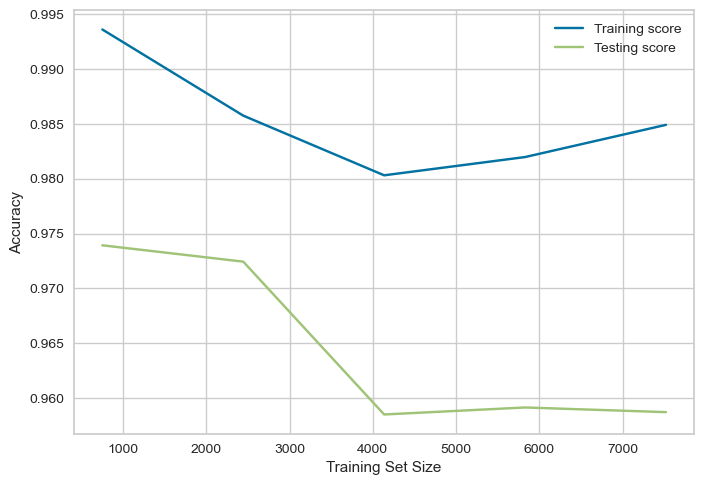

In [58]:
train_sizes, train_scores, test_scores = learning_curve(model_knn, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

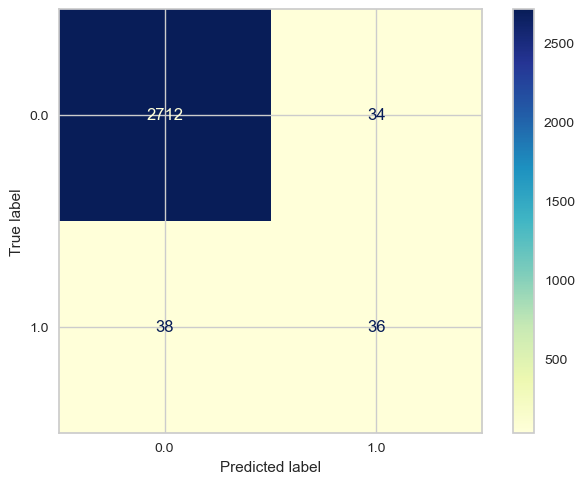

In [60]:
#from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## 3. Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

start = time.time()
model_rf = RandomForestClassifier(n_estimators=100, n_jobs=-1,
                               random_state=0, bootstrap=True).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_rf.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)
print("Random Forest Model\n" + classification_report(y_test, y_predictions))


Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820



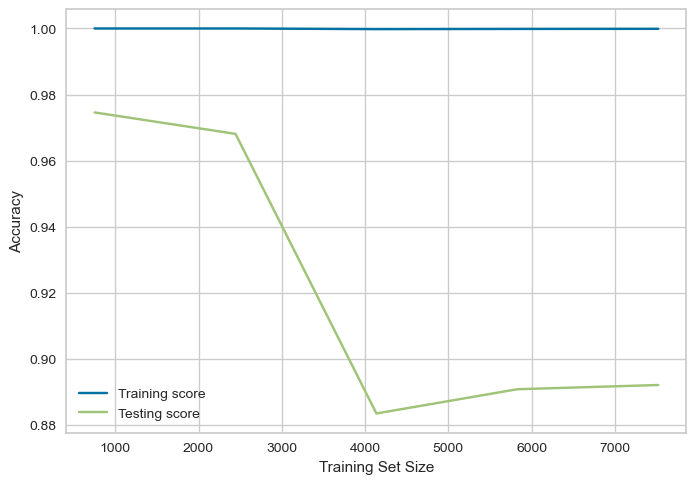

In [62]:
train_sizes, train_scores, test_scores = learning_curve(model_rf, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

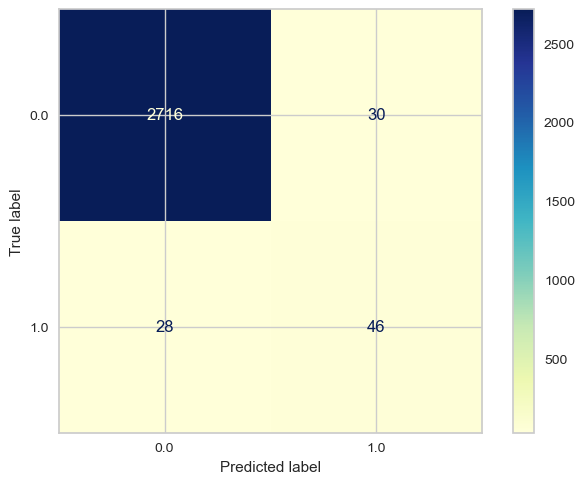

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

There is still Overfitting. Lets use Out of Bag Validation to see if there is any improvement

Random Forest Model
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.61      0.62      0.61        74

    accuracy                           0.98      2820
   macro avg       0.80      0.81      0.80      2820
weighted avg       0.98      0.98      0.98      2820

OOB Score: 0.9731003039513678


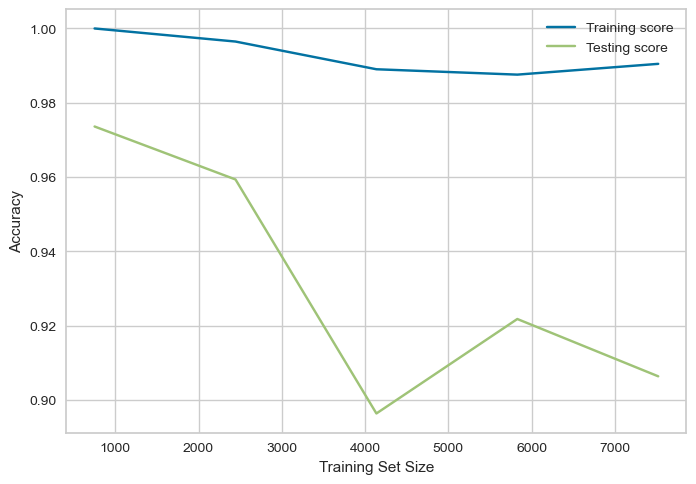

In [64]:
start = time.time()
model_rf2 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, 
                               oob_score=True, class_weight="balanced", random_state=42)
model_rf2.fit(X_train, y_train)
end_train = time.time()
y_predictions = model_rf.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Random Forest", y_test, y_predictions)
print("Random Forest Model\n" + classification_report(y_test, y_predictions))
print("OOB Score:", model_rf2.oob_score_)
train_sizes, train_scores, test_scores = learning_curve(model_rf2, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

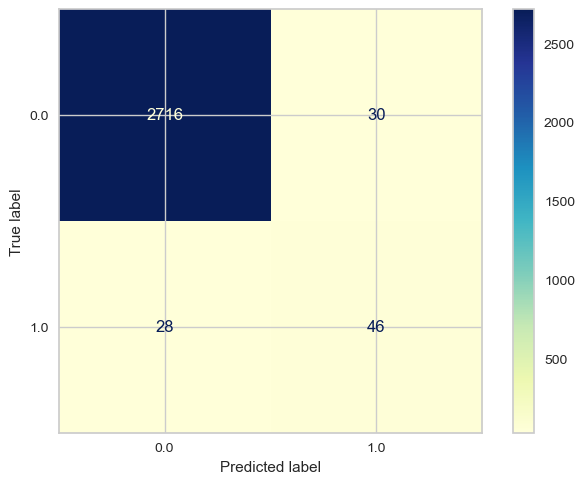

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## 4. Gradient Boosting Model

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()
model_gb = GradientBoostingClassifier().fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_gb.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))


Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2746
         1.0       0.42      0.74      0.54        74

    accuracy                           0.97      2820
   macro avg       0.71      0.86      0.76      2820
weighted avg       0.98      0.97      0.97      2820



In [67]:
train_sizes, train_scores, test_scores = learning_curve(model_gb, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 665, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "C:\Users\HP\anaconda3\lib\site-pa

In [68]:
start = time.time()
model_gb = GradientBoostingClassifier(n_estimators=200,  # More trees
                                   learning_rate=0.05,  # Lower learning rate
                                   max_depth=5, 
                                   min_samples_split=10, 
                                   random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_gb.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.58      0.68      0.62        74

    accuracy                           0.98      2820
   macro avg       0.79      0.83      0.81      2820
weighted avg       0.98      0.98      0.98      2820



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 665, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "C:\Users\HP\anaconda3\lib\site-pa

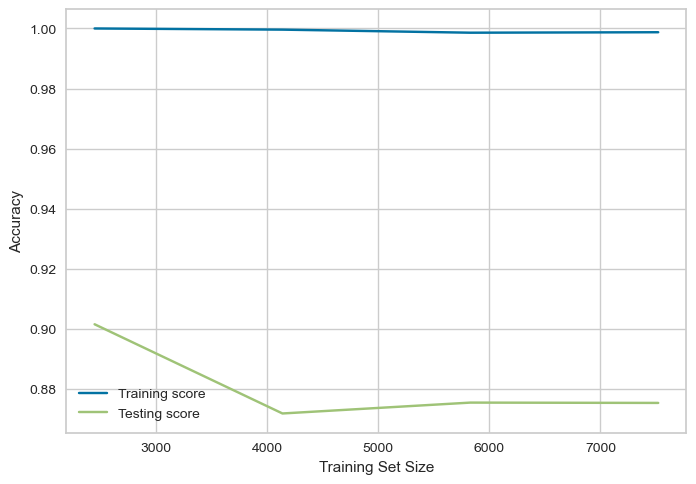

In [69]:
train_sizes, train_scores, test_scores = learning_curve(model_gb, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

In [70]:
start = time.time()
model_gb = GradientBoostingClassifier(n_estimators=200, 
                                   max_depth=5, 
                                   learning_rate=0.05, 
                                   min_samples_split=10, 
                                   max_features="sqrt",  # Reduces feature correlation
                                   random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_gb.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gradient Boosting", y_test, y_predictions)
print("Gradient Boosting\n" + classification_report(y_test, y_predictions))

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.56      0.69      0.62        74

    accuracy                           0.98      2820
   macro avg       0.78      0.84      0.80      2820
weighted avg       0.98      0.98      0.98      2820



In [71]:
train_sizes, train_scores, test_scores = learning_curve(model_gb, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 665, in fit
    y = self._encode_y(y=y, sample_weight=None)
  File "C:\Users\HP\anaconda3\lib\site-pa

In [72]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  


## 5. Gaussian Naive Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

start = time.time()
model_nb = GaussianNB().fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_nb.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Gaussian Naive Bayes", y_test, y_predictions)
print("Gaussian Naive Bayes\n" + classification_report(y_test, y_predictions))


Gaussian Naive Bayes
              precision    recall  f1-score   support

         0.0       0.99      0.83      0.90      2746
         1.0       0.12      0.82      0.20        74

    accuracy                           0.83      2820
   macro avg       0.55      0.83      0.55      2820
weighted avg       0.97      0.83      0.89      2820



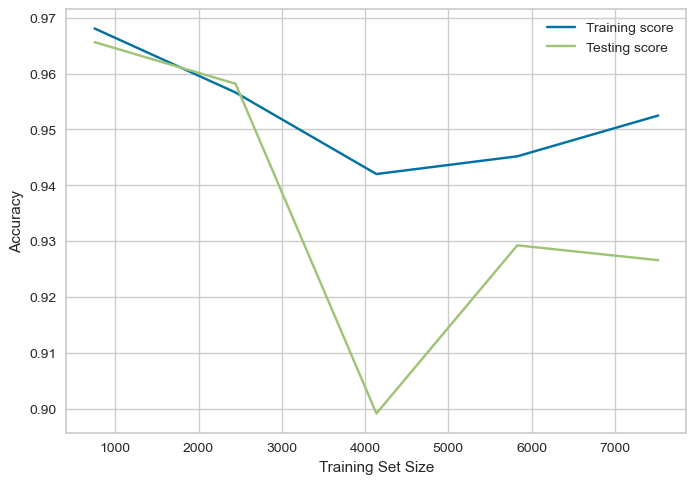

In [74]:
train_sizes, train_scores, test_scores = learning_curve(model_nb, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

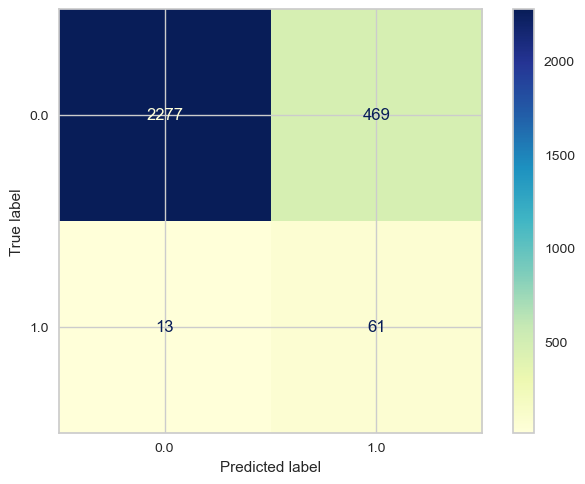

In [75]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  


## 6. MLP

In [76]:
from sklearn.neural_network import MLPClassifier

start = time.time()
model_mlp1 = MLPClassifier(random_state=1, max_iter=600, learning_rate="invscaling").fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_mlp1.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)

In [77]:
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.74      0.61        74

    accuracy                           0.97      2820
   macro avg       0.75      0.86      0.80      2820
weighted avg       0.98      0.97      0.98      2820



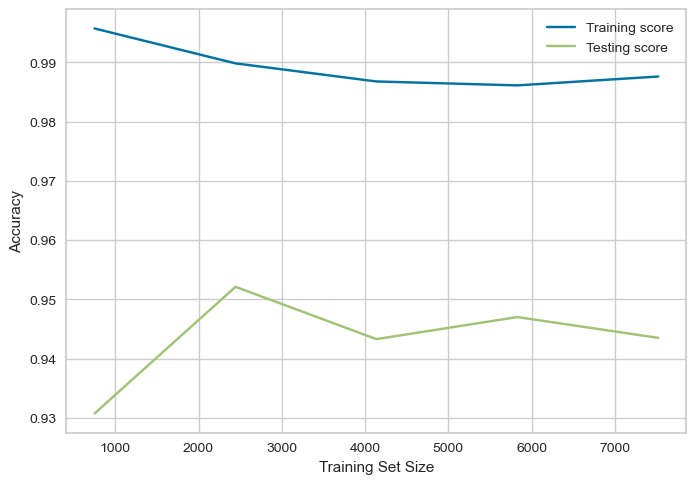

In [78]:
train_sizes, train_scores, test_scores = learning_curve(model_mlp1, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

Text(0, 0.5, 'Loss')

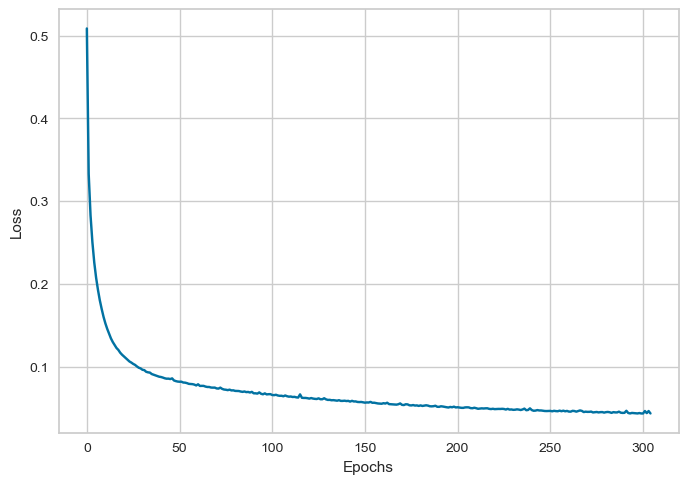

In [79]:
plt.plot(model_mlp1.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")

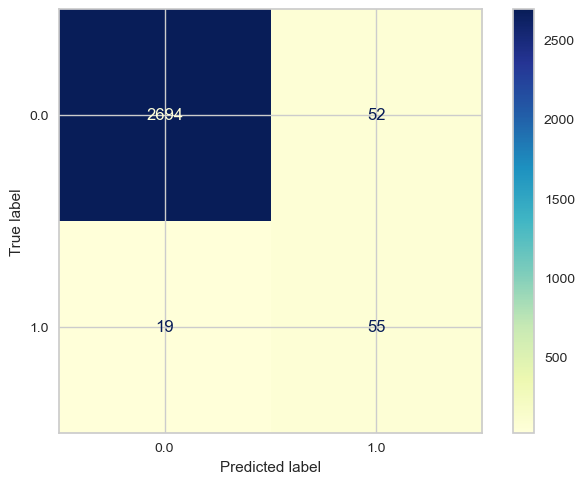

In [80]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  


In [78]:
start = time.time()
model_mlp = MLPClassifier(hidden_layer_sizes=(100, 50),  
                      activation='relu',  
                      solver='adam',  
                      alpha=0.001,  # Increased regularization
                      learning_rate="adaptive", 
                      max_iter=1000,  
                      random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = model_mlp.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Multi-layer Perceptron", y_test, y_predictions)
print("Multi-layer Perceptron\n" + classification_report(y_test, y_predictions))

Multi-layer Perceptron
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.77      0.64      0.70        74

    accuracy                           0.99      2820
   macro avg       0.88      0.82      0.84      2820
weighted avg       0.98      0.99      0.98      2820



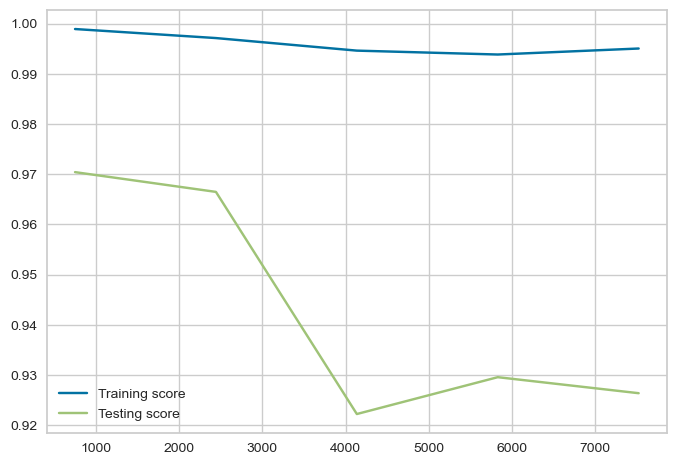

In [79]:
train_sizes, train_scores, test_scores = learning_curve(model_mlp, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.show()

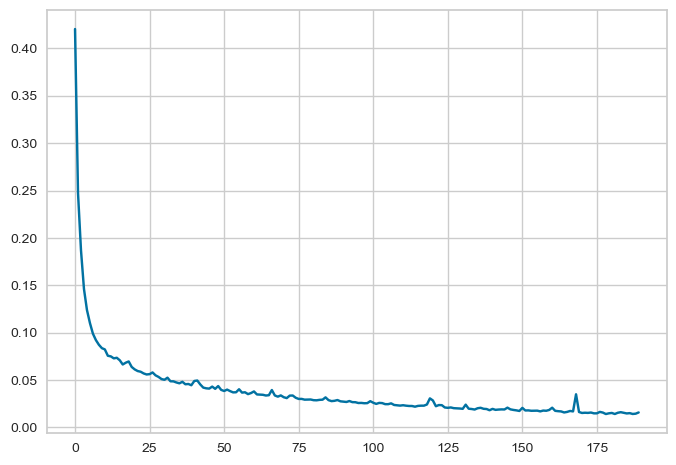

In [80]:
plt.plot(model_mlp.loss_curve_)

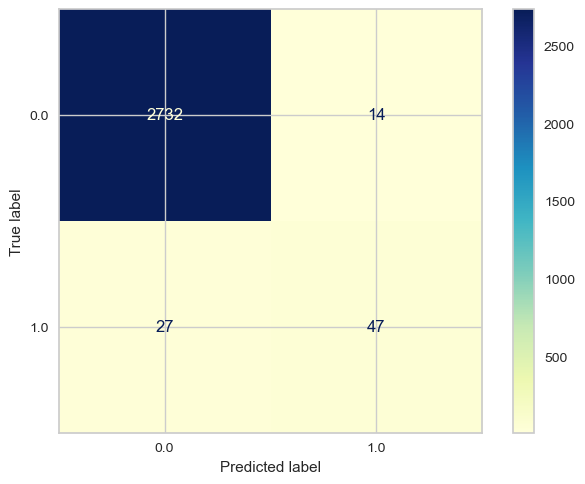

In [81]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

In [81]:
model_performance

Accuracy  Precision    Recall  F1-Score  \
Decision Tree           0.966312   0.977506  0.966312  0.970705   
k-NN                    0.974468   0.973799  0.974468  0.974123   
Random Forest           0.979433   0.979705  0.979433  0.979566   
Gradient Boosting       0.977660   0.980259  0.977660  0.978776   
Gaussian Naive Bayes    0.829078   0.971251  0.829078  0.885860   
Multi-layer Perceptron  0.985461   0.984448  0.985461  0.984778   

                        Training time  Prediction time  
Decision Tree               42.617598         0.000000  
k-NN                         0.027479         0.123683  
Random Forest                0.937335         0.047840  
Gradient Boosting            2.302262         0.011017  
Gaussian Naive Bayes         0.004830         0.001022  
Multi-layer Perceptron      13.943301         0.014404

## 7. Logistic Regression

In [81]:
from sklearn.linear_model import LogisticRegression
start = time.time()
log_reg = LogisticRegression(max_iter=1000, random_state=42).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = log_reg.predict(X_test)
end_predict = time.time()

# evaluate the model
log_scores("Logistic Regression", y_test, y_predictions)
print("Logistic Regression\n" + classification_report(y_test, y_predictions))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.95      2746
         1.0       0.18      0.80      0.29        74

    accuracy                           0.90      2820
   macro avg       0.59      0.85      0.62      2820
weighted avg       0.97      0.90      0.93      2820



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1301, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 clas

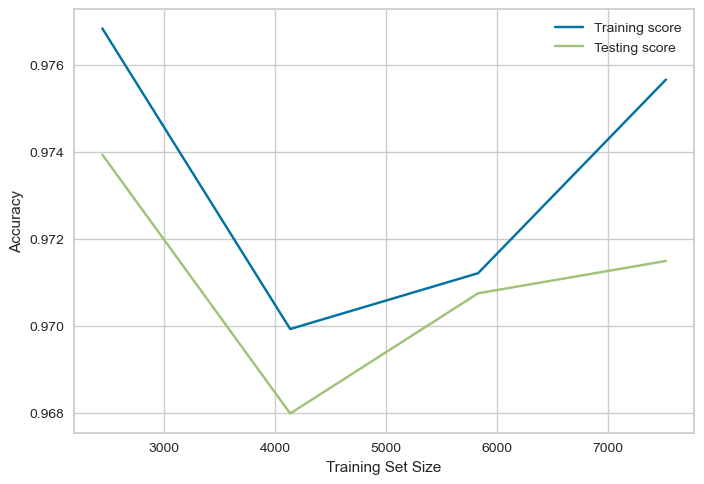

In [82]:
train_sizes, train_scores, test_scores = learning_curve(log_reg, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

In [83]:
# Fine Tuning Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear', 'saga'],  # Supports L1/L2 penalties
    'class_weight': ['balanced', None]  # Adjust for class imbalance
}
# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(log_reg, param_grid_lr, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search.fit(X_train_osampled, y_train_osampled)
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
# Train Logistic Regression with best hyperparameters
start = time.time()
log_reg_best = LogisticRegression(**best_params, max_iter=1000, random_state=42)
log_reg_best.fit(X_train_osampled, y_train_osampled)
# Predictions
y_predictions = log_reg_best.predict(X_test)
end_predict = time.time()
log_scores("Tuned Logistic Regression", y_test, y_predictions)
print("Classification Report:\n", classification_report(y_test, y_predictions))


Best Hyperparameters: {'C': 1, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      2746
         1.0       0.18      0.77      0.30        74

    accuracy                           0.90      2820
   macro avg       0.59      0.84      0.62      2820
weighted avg       0.97      0.90      0.93      2820



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1276, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Use

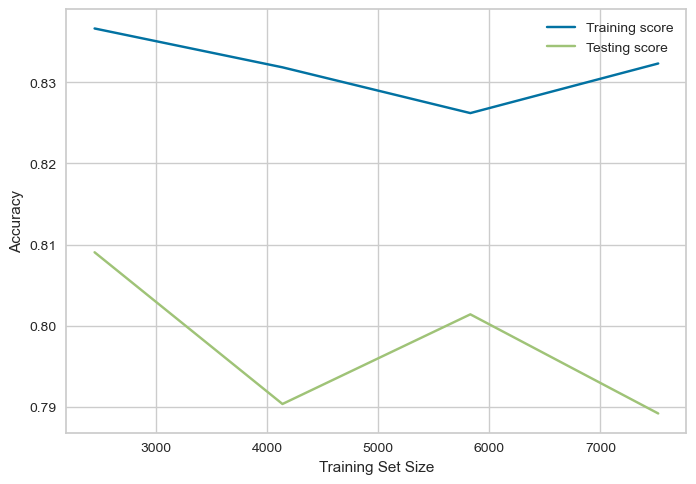

In [84]:
train_sizes, train_scores, test_scores = learning_curve(log_reg_best, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

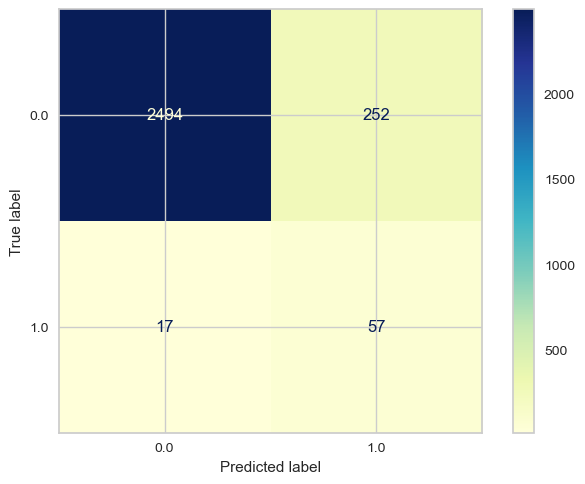

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

## 8. Support Vector Machines

In [86]:
from sklearn.svm import SVC
param_grid_sv = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
    'gamma': ['scale', 'auto'] , # Kernel coefficient for 'rbf' and 'poly'
    'class_weight': ['balanced']  # Adjusting for class imbalance
}
# Initialize Support Vector Classifier
svc = SVC()

# Perform Grid Search with 5-fold cross-validation
grid_search_sv = GridSearchCV(svc, param_grid_sv, scoring='f1_macro', cv=5, n_jobs=-1)
grid_search_sv.fit(X_train_osampled, y_train_osampled)
best_params = grid_search_sv.best_params_
print("Best Hyperparameters:", best_params)
start = time.time()
svc_best = SVC(**best_params).fit(X_train_osampled, y_train_osampled)
end_train = time.time()
y_predictions = svc_best.predict(X_test)
end_predict = time.time()
log_scores("Supprt Vector Machines", y_test, y_predictions)
print("Classification Report:\n", classification_report(y_test, y_predictions))


Best Hyperparameters: {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2746
         1.0       0.51      0.66      0.58        74

    accuracy                           0.97      2820
   macro avg       0.75      0.82      0.78      2820
weighted avg       0.98      0.97      0.98      2820



C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
1 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 199, in fit
    y = self._validate_targets(y)
  File "C:\Users\HP\anaconda3\lib\site-packages\sklearn\sv

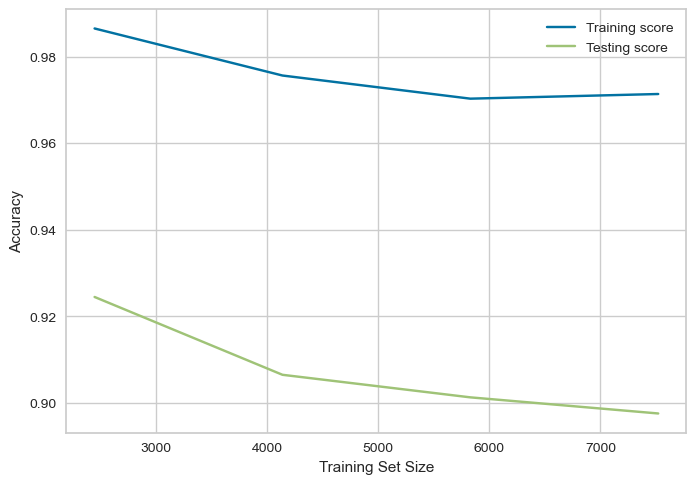

In [87]:
train_sizes, train_scores, test_scores = learning_curve(svc_best, X, y, cv=5)

# plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores .mean(axis=1), label='Testing score')
plt.legend(loc='best')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.show()

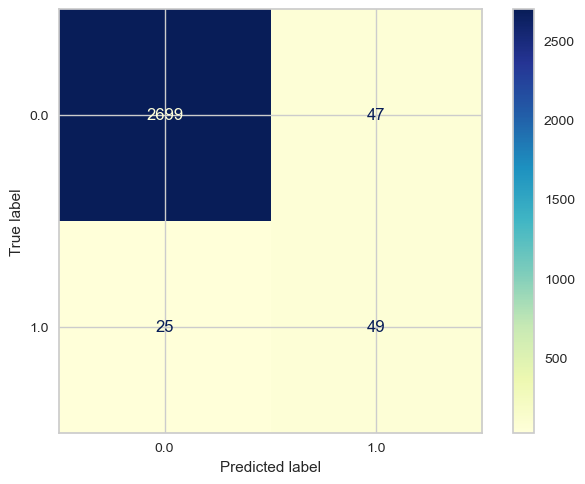

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predictions, cmap=plt.cm.YlGnBu)  

### Threshold Tuning for SVM

Best Threshold: 0.6764
Classification Report after Threshold Tuning:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2746
         1.0       0.73      0.62      0.67        74

    accuracy                           0.98      2820
   macro avg       0.86      0.81      0.83      2820
weighted avg       0.98      0.98      0.98      2820



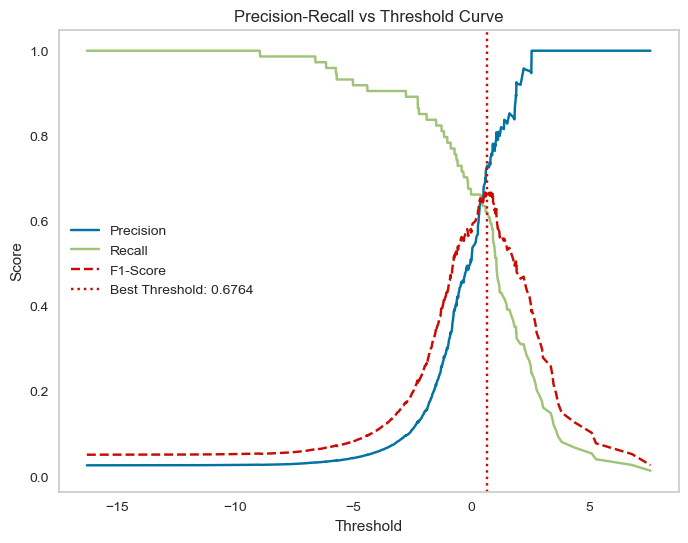

In [93]:
from sklearn.metrics import precision_recall_curve
decision_scores = svc_best.decision_function(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)
# Compute F1-score for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
f1_scores = np.nan_to_num(f1_scores)  # Handle NaN values

# Find the threshold that maximizes the F1-score
best_threshold_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_threshold_idx]

print(f"Best Threshold: {best_threshold:.4f}")

# Apply the best threshold for new predictions
y_pred_adjusted = (decision_scores >= best_threshold).astype(int)

# Evaluate performance with new threshold
log_scores("Support Vector Machines", y_test, y_pred_adjusted)
print("Classification Report after Threshold Tuning:")
print(classification_report(y_test, y_pred_adjusted))
# Plot Precision-Recall curve with F1-score
plt.figure(figsize=(8,6))
plt.plot(thresholds, precisions[:-1], label="Precision")
plt.plot(thresholds, recalls[:-1], label="Recall")
plt.plot(thresholds, f1_scores[:-1], label="F1-Score", linestyle="dashed")
plt.axvline(best_threshold, color='r', linestyle="dotted", label=f"Best Threshold: {best_threshold:.4f}")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision-Recall vs Threshold Curve")
plt.grid()
plt.show()

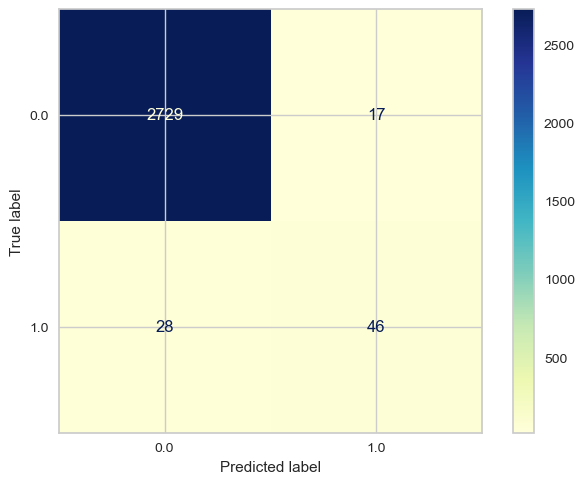

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_adjusted, cmap=plt.cm.YlGnBu)  

In [95]:
model_performance

Accuracy  Precision    Recall  F1-Score  \
Decision Tree              0.966312   0.977506  0.966312  0.970705   
k-NN                       0.974468   0.973799  0.974468  0.974123   
Random Forest              0.979433   0.979705  0.979433  0.979566   
Gradient Boosting          0.977660   0.980259  0.977660  0.978776   
Gaussian Naive Bayes       0.829078   0.971251  0.829078  0.885860   
Multi-layer Perceptron     0.985461   0.984448  0.985461  0.984778   
Logistic Regression        0.898936   0.972601  0.898936  0.928450   
Tuned Logistic Regression  0.904610   0.972007  0.904610  0.931742   
Supprt Vector Machines     0.974468   0.978216  0.974468  0.976069   
Support Vector Machines    0.984043   0.983030  0.984043  0.983418   

                           Training time  Prediction time  
Decision Tree                  21.389938         0.000000  
k-NN                            0.026153         0.128588  
Random Forest                   0.966547         0.048965  
Gradient Boosting               3.986526         0.014816  
Gaussian Naive Bayes            0.006125         0.001770  
Multi-layer Perceptron         16.906028         0.000000  
Logistic Regression             0.079578         0.000000  
Tuned Logistic Regression     -99.233141        99.794621  
Supprt Vector Machines          1.307580         0.194866  
Support Vector Machines         1.307580         0.194866

## Based on these performance metrics MLP Classifier seems to be the best . This will be deployed on AWS

In [96]:
import joblib
joblib.dump(model_mlp1, 'mlp_model.pkl')

['mlp_model.pkl']